# DBSCAN

DBSCAN stands for *Density-based spatial clustering of applications with noise* is a data clustering algorithm developed in 1996 by Martin Ester, Hans-Peter Kriegel, Jörg Sander, and Xiaowei Xu. It is a non-parametric density-based clustering algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), identifying outliers as points that lie alone in low-density regions (whose nearest neighbors are too far away).



The major benefits with respect to k-mean and clustering and hierarchical clustering:
- The user is  not required to set an initial number of clusters (elbow method to find the right number of clusters miniming SSD)
- It is very robust to outliers, SVMs largerly suffer from those
- It can draw also non-spherical clusters.

<br>

In order to fit a DBCAN the user is required to set up 2 parameters:

1. **Eps**: the maximum distance between two observation belonging to the same cluster
2. **minPts**: the minimum number of observation to be called a cluster.

In this notebook we are going to cluster with DBSCAN demonstrating better performances against the other two algorithms.

<br><br>
At first let's import the required libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

plt.rcParams["figure.figsize"] = (14, 10)
sns.set()

Then remeber the function <span style="font-family: Monaco">make_blobs</span>? 
<span style="font-family: Monaco">make_moons</span> randomly generates moons od data instead of blobs 



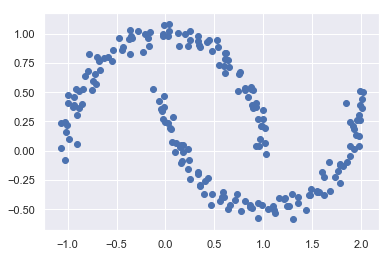

In [ ]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:,0],X[:,1])
plt.show()

With this kind of data it is impossibile to reach a decent classification with already presented two algorithms. Let's see this behaviour.

## K-means

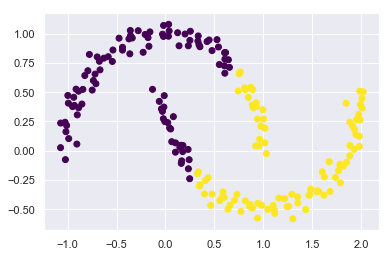

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
km.fit(X)
y_km = km.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_km,cmap='viridis')
plt.show()

## Hierarchical Clustering (aggolomerative)

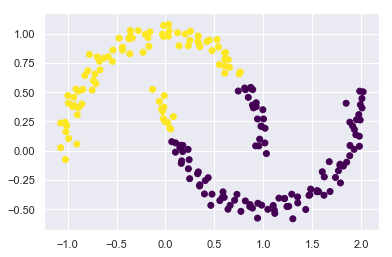

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2, linkage="complete")
y_ac = ac.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_ac,cmap='viridis')
plt.show()

## DBSCAN

Now let's take a DBSCAN as it is already been pointed out **we are not required to set the number of clusters**, instead **EPS** and **minPts** are the two parameters of interest.


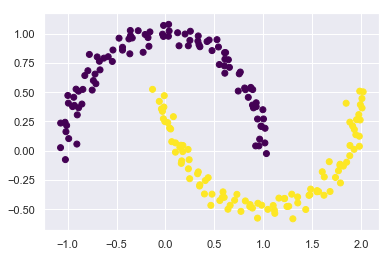

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.25, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_dbscan,cmap='viridis')
#core_pts = dbscan.components_
#plt.scatter(x=core_pts[:, 0], y=core_pts[:, 1], c='red', s=200, alpha=0.5);
plt.show()


DBSCAN did its best and perferctly classifies datta into 2 "moon" clusters.

## DBSCAN limits

The main problem of DBSCAN regards the optimization of the two parameters and this might be difficult under the wildly different clusters desities circumstances. That means when the data is umbalaced i.e. the numerosity of one cluster is way greater than the other (in a binary classification scenario). 


## References 
- Wikipedia Contributors (2021). DBSCAN. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/DBSCAN [Accessed 23 Apr. 2021].

‌